In [1]:
import pandas as pd
import numpy as np
import sweetviz as sv
import warnings
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from matplotlib import pyplot
from xgboost import plot_importance
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score

/home/rahul/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('nasa.csv')

In [4]:
df.iloc[:,5:].head()

,Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [5]:
df.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [6]:
df = df.drop(['Neo Reference ID', 'Name','Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)','Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec','Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)','Miss Dist.(miles)','Orbiting Body',
       'Orbit ID', 'Orbit Determination Date','Equinox'],axis=1)

In [7]:
# graphical representation

In [11]:
my_rep = sv.analyze(df)

Done! Use 'show' commands to display/save.   |█| [100%]   00:04 -> (00:


In [12]:
my_rep.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [48]:
df.isna().sum()

Absolute Magnitude             0
Est Dia in KM(min)             0
Est Dia in KM(max)             0
Relative Velocity km per hr    0
Miss Dist.(kilometers)         0
Orbit Uncertainity             0
Minimum Orbit Intersection     0
Jupiter Tisserand Invariant    0
Epoch Osculation               0
Eccentricity                   0
Semi Major Axis                0
Inclination                    0
Asc Node Longitude             0
Orbital Period                 0
Perihelion Distance            0
Perihelion Arg                 0
Aphelion Dist                  0
Perihelion Time                0
Mean Anomaly                   0
Mean Motion                    0
Hazardous                      0
dtype: int64

In [8]:
X = df.drop('Hazardous',axis=1)
y = df['Hazardous']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [10]:
sm = SMOTE()

In [11]:
X_res,y_res = sm.fit_resample(X_train,y_train)

In [12]:
X_res.shape

(6278, 20)

In [13]:
y_res.value_counts()

False    3139
True     3139
Name: Hazardous, dtype: int64

In [14]:
xgb = XGBClassifier()

In [15]:
xgb.fit(X_res,y_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

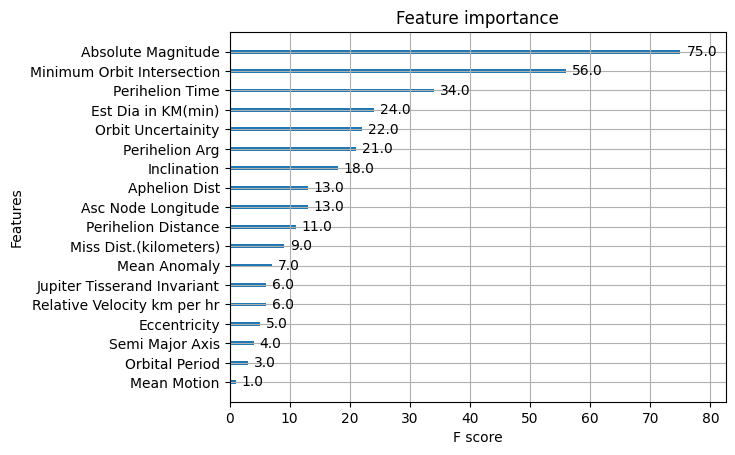

In [16]:
plot_importance(xgb)

In [17]:
y_pred = xgb.predict(X_test)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00       793
        True       0.99      0.97      0.98       145

    accuracy                           0.99       938
   macro avg       0.99      0.98      0.99       938
weighted avg       0.99      0.99      0.99       938



In [19]:
accuracy_score(y_test,y_pred)

0.9936034115138592

In [20]:
cf = confusion_matrix(y_test,y_pred)

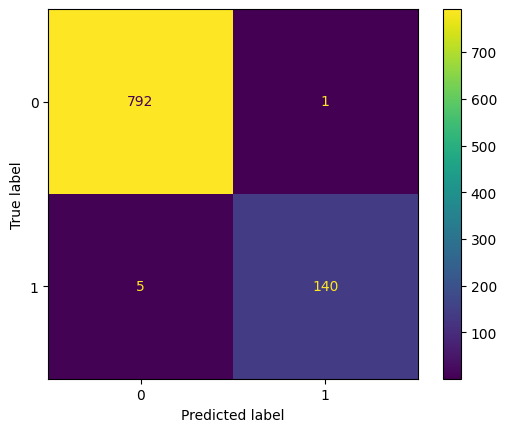

In [21]:
c =ConfusionMatrixDisplay(cf)
c.plot()

In [22]:
xgb.score(X_res,y_res)

1.0

In [23]:
xgb.score(X_test,y_test)

0.9936034115138592